In [576]:
import pandas as pd

In [577]:
#exploring QVI_purchase_behaviour i.e customer data

In [578]:
df=pd.read_csv('QVI_purchase_behaviour.csv')

In [579]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [581]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [582]:
df.duplicated().sum()

0

In [583]:
df['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [584]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [585]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Title:Customer count based on Categorization')

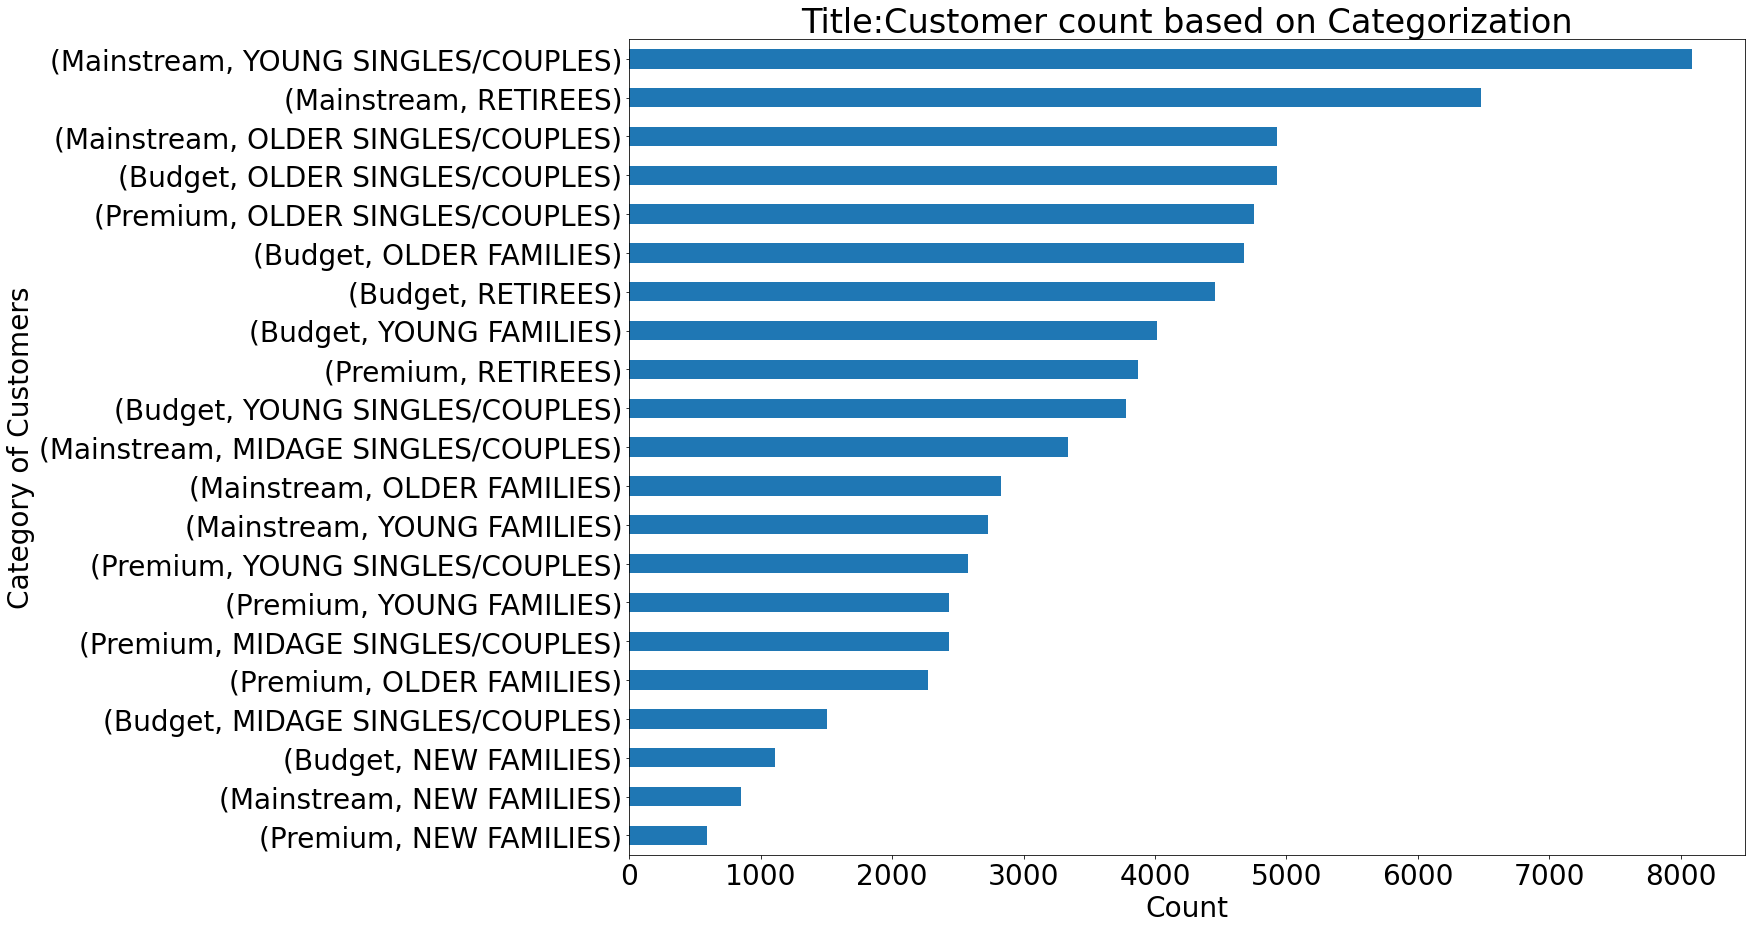

In [738]:
df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().sort_values().plot(kind='barh',figsize=(20,15))
plt.rcParams.update({'font.size': 28})
plt.ylabel('Category of Customers')
plt.xlabel('Count')
plt.title('Title:Customer count based on Categorization')

In [587]:
#exploring QVI_transaction_data i.e chip purchases

In [588]:
df1=pd.read_excel('QVI_transaction_data.xlsx')

In [589]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [590]:
df1['DATE'].head(10)

0    43390
1    43599
2    43605
3    43329
4    43330
5    43604
6    43601
7    43601
8    43332
9    43330
Name: DATE, dtype: int64

In [591]:
#the date field doesnot make sense,it should be looked into further to get unambiguous data

In [592]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [593]:
df1.duplicated().sum()

1

In [594]:
df1[df1.duplicated()==True]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [595]:
df1[df1['TXN_ID']==108462]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124844,43374,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [596]:
df1.drop_duplicates(inplace=True)

In [597]:
df.duplicated().sum()

0

In [598]:
#removed the duplicate row

In [599]:
df1[df1['PROD_NAME']=='Kettle 135g Swt Pot Sea Salt'].index

Int64Index([    65,    153,    174,    177,    348,    354,    398,    623,
               711,    712,
            ...
            263732, 263950, 264001, 264547, 264561, 264564, 264574, 264725,
            264767, 264823],
           dtype='int64', length=3257)

In [600]:
df1['PROD_NAME'].replace('Kettle 135g Swt Pot Sea Salt','Kettle Swt Pot Sea Salt 135g',inplace=True)

In [601]:
df1[df1['PROD_NAME']=='Kettle 135g Swt Pot Sea Salt'].index

Int64Index([], dtype='int64')

In [602]:
df1[df1['PROD_NAME']=='Kettle Swt Pot Sea Salt 135g']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
65,43605,83,83008,82099,63,Kettle Swt Pot Sea Salt 135g,2,8.4
153,43602,208,208139,206906,63,Kettle Swt Pot Sea Salt 135g,1,4.2
174,43332,237,237227,241132,63,Kettle Swt Pot Sea Salt 135g,2,8.4
177,43602,243,243070,246706,63,Kettle Swt Pot Sea Salt 135g,1,4.2
348,43399,7,7077,6604,63,Kettle Swt Pot Sea Salt 135g,2,8.4
...,...,...,...,...,...,...,...,...
264564,43381,260,260240,259480,63,Kettle Swt Pot Sea Salt 135g,2,8.4
264574,43628,261,261035,259860,63,Kettle Swt Pot Sea Salt 135g,2,8.4
264725,43301,266,266413,264246,63,Kettle Swt Pot Sea Salt 135g,1,4.2
264767,43624,269,269133,265839,63,Kettle Swt Pot Sea Salt 135g,2,8.4


In [603]:
#fixed an error in semantics of the PROD_NAME

In [604]:
df1[['PROD_QTY','TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000
mean,1.907308,7.304205
std,0.643655,3.083231
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


In [605]:
df1[df1['PROD_QTY']>df1['PROD_QTY'].quantile(0.75)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
11,43332,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
16,43330,20,20418,17413,94,Burger Rings 220g,4,9.2
...,...,...,...,...,...,...,...,...
258745,43604,220,220338,219884,98,NCC Sour Cream & Garden Chives 175g,3,9.0
258759,43599,238,238169,242560,44,Thins Chips Light& Tangy 175g,4,13.2
258770,43603,248,248246,250503,80,Natural ChipCo Sea Salt & Vinegr 175g,3,9.0
258782,43327,259,259174,258569,92,WW Crinkle Cut Chicken 175g,3,5.1


In [606]:
df1[df1['PROD_QTY']>10]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [607]:
df2=df1[df1['PROD_QTY']>10]

In [608]:
#removing outliers having huge PROD_QTY

In [609]:
df1.shape

(264835, 8)

In [610]:
df1=df1[~(df1['PROD_QTY']>10)]# ~ for not

In [611]:
df1.shape

(264833, 8)

In [612]:
#combining dataset

In [613]:
df2=pd.merge(df,df1,on='LYLTY_CARD_NBR')

In [614]:
df2.shape

(264833, 10)

In [615]:
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [616]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264833 non-null  int64  
 1   LIFESTAGE         264833 non-null  object 
 2   PREMIUM_CUSTOMER  264833 non-null  object 
 3   DATE              264833 non-null  int64  
 4   STORE_NBR         264833 non-null  int64  
 5   TXN_ID            264833 non-null  int64  
 6   PROD_NBR          264833 non-null  int64  
 7   PROD_NAME         264833 non-null  object 
 8   PROD_QTY          264833 non-null  int64  
 9   TOT_SALES         264833 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [617]:
df2.duplicated().sum()

0

In [618]:
df2['PROD_NAME'].head()

0    Natural Chip        Compny SeaSalt175g
1     Red Rock Deli Chikn&Garlic Aioli 150g
2     Grain Waves Sour    Cream&Chives 210G
3    Natural ChipCo      Hony Soy Chckn175g
4            WW Original Stacked Chips 160g
Name: PROD_NAME, dtype: object

In [619]:
df2['PROD_SIZE']=df2['PROD_NAME'].apply(lambda x:x[-4:])

In [620]:
df2['PROD_SIZE'].head()

0    175g
1    150g
2    210G
3    175g
4    160g
Name: PROD_SIZE, dtype: object

In [621]:
df2['PROD_SIZE']=df2['PROD_SIZE'].str.strip('g').str.strip('G')

In [622]:
df2['PROD_SIZE'].head()

0    175
1    150
2    210
3    175
4    160
Name: PROD_SIZE, dtype: object

In [623]:
df2['PROD_NAME']=df2['PROD_NAME'].apply(lambda x: x[:-4])

In [624]:
df2['PROD_NAME'].head()

0    Natural Chip        Compny SeaSalt
1     Red Rock Deli Chikn&Garlic Aioli 
2     Grain Waves Sour    Cream&Chives 
3    Natural ChipCo      Hony Soy Chckn
4            WW Original Stacked Chips 
Name: PROD_NAME, dtype: object

In [625]:
#exploring Number of purchases made by customers

In [626]:
df_customer_segment=df2.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique()

In [627]:
df_customer_segment=df_customer_segment.reset_index()

In [628]:
df_customer_segment.head()

,LYLTY_CARD_NBR,TXN_ID
0,1000,1
1,1002,1
2,1003,2
3,1004,1
4,1005,1


In [629]:
df_customer_segment.rename(columns={'TXN_ID':'Number of Transactions'},inplace=True)

Text(0.5, 1.0, 'Frequency of Number of Purchases made by customers')

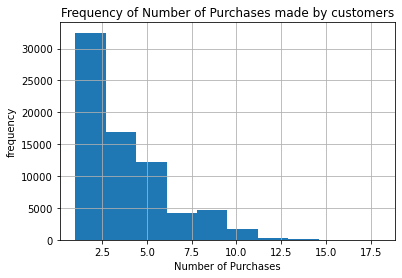

In [630]:
df_customer_segment['Number of Transactions'].hist()
plt.xlabel('Number of Purchases')
plt.ylabel('frequency')
plt.title('Frequency of Number of Purchases made by customers')

In [631]:
df_customer_segment['Number of Transactions'].describe()

count    72636.000000
mean         3.622543
std          2.599395
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         18.000000
Name: Number of Transactions, dtype: float64

In [632]:
#exploring total amount spent by customers during all their purchases

In [633]:
df_customer_segment_sales=df2.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()

In [634]:
df_customer_segment_sales=df_customer_segment_sales.reset_index()

In [635]:
df_customer_segment_sales.rename(columns={'TOT_SALES':'TOT_amt_SPENT'},inplace=True)

In [636]:
df_customer_segment_sales['TOT_amt_SPENT'].describe()

count    72636.000000
mean        26.613649
std         20.271021
min          1.500000
25%          9.100000
50%         21.700000
75%         40.000000
max        138.600000
Name: TOT_amt_SPENT, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Amount spent by customers')

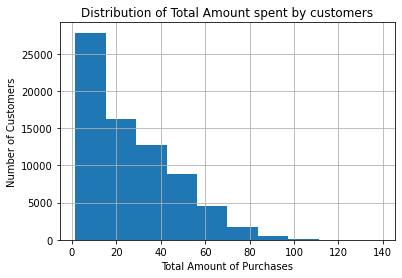

In [637]:
df_customer_segment_sales['TOT_amt_SPENT'].hist()
plt.xlabel('Total Amount of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Amount spent by customers')

In [638]:
df_customer_segment=pd.merge(df_customer_segment,df_customer_segment_sales,on='LYLTY_CARD_NBR')

In [639]:
df_customer_segment=df_customer_segment.sort_values(by=['Number of Transactions','TOT_amt_SPENT'],ascending=[False,False])

In [640]:
df_customer_segment.describe()

,LYLTY_CARD_NBR,Number of Transactions,TOT_amt_SPENT
count,7.263600e+04,72636.000000,72636.000000
mean,1.361847e+05,3.622543,26.613649
std,8.989293e+04,2.599395,20.271021
min,1.000000e+03,1.000000,1.500000
25%,6.620175e+04,1.000000,9.100000
50%,1.340395e+05,3.000000,21.700000
75%,2.033742e+05,5.000000,40.000000
max,2.373711e+06,18.000000,138.600000


In [641]:
Customer_Segment_1=df_customer_segment[df_customer_segment['TOT_amt_SPENT']<=40]

In [642]:
Customer_Segment_2=df_customer_segment[~(df_customer_segment['TOT_amt_SPENT']<=40)]

Customer_Segment_1 are people who have spent no more than 40 dollars in total

Customer_Segment_2 are people who have spent  more than 40 dollars in total

Exploring Customer_Segment_1

In [643]:
Customer_Segment_1.shape

(54583, 3)

In [644]:
Customer_Segment_1[['Number of Transactions','TOT_amt_SPENT']].describe()

,Number of Transactions,TOT_amt_SPENT
count,54583.000000,54583.000000
mean,2.426836,17.022305
std,1.432041,11.008914
min,1.000000,1.500000
25%,1.000000,7.500000
50%,2.000000,15.000000
75%,3.000000,26.000000
max,8.000000,40.000000


Total Revenue from Segment 1

In [645]:
Customer_Segment_1['TOT_amt_SPENT'].sum()

929128.5

In [647]:
Customer_Segment_1_further_analysis=df2[df2['LYLTY_CARD_NBR'].isin(Customer_Segment_1['LYLTY_CARD_NBR'])]

In [648]:
#exploring products of customer segment 1

In [656]:
customer_segment_1_products_exploration=Customer_Segment_1_further_analysis.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False)

Top Ten Most popular Products of Customer Segment 1

In [657]:
customer_segment_1_products_exploration.head(10)

PROD_NAME
Cobs Popd Swt/Chlli &Sr/Cream Chips     3256
Cobs Popd Sea Salt  Chips               3249
Thins Potato Chips  Hot & Spicy         3244
Thins Chips Light&  Tangy               3232
Pringles SourCream  Onion               3172
Pringles Sweet&Spcy BBQ                 3172
Pringles Barbeque                       3172
Thins Chips Seasonedchicken             3166
Infuzions Thai SweetChili PotatoMix     3154
Doritos Corn Chip Southern Chicken      3138
Name: PROD_QTY, dtype: int64

Top Ten Least popular Products of Customer Segment 1

In [658]:
customer_segment_1_products_exploration.tail(10)

PROD_NAME
RRD Lime & Pepper                      1209
French Fries Potato Chips              1207
GrnWves Plus Btroot & Chilli Jam       1205
RRD Pc Sea Salt                        1205
RRD Salt & Vinegar                     1202
Cheetos Chs & Bacon Balls              1194
Smiths Crinkle Cut  Salt & Vinegar     1182
Smiths Chip Thinly  CutSalt/Vinegr     1181
NCC Sour Cream &    Garden Chives      1177
Thins Chips         Originl saltd      1173
Name: PROD_QTY, dtype: int64

Categorization of Customers of  Customer Segment 1

Text(0.5, 1.0, 'Categorization of Customers in Customer Segment 1')

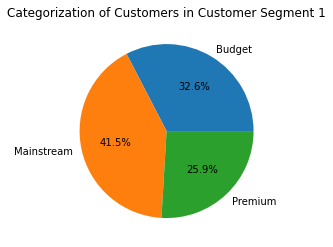

In [659]:
Customer_Segment_1_further_analysis.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique().plot(kind='pie',autopct='%1.1f%%',label=' ')
plt.title('Categorization of Customers in Customer Segment 1')

Sub-Categorization of Customers of Customer Segment 1

Text(0, 0.5, 'Number of Customers')

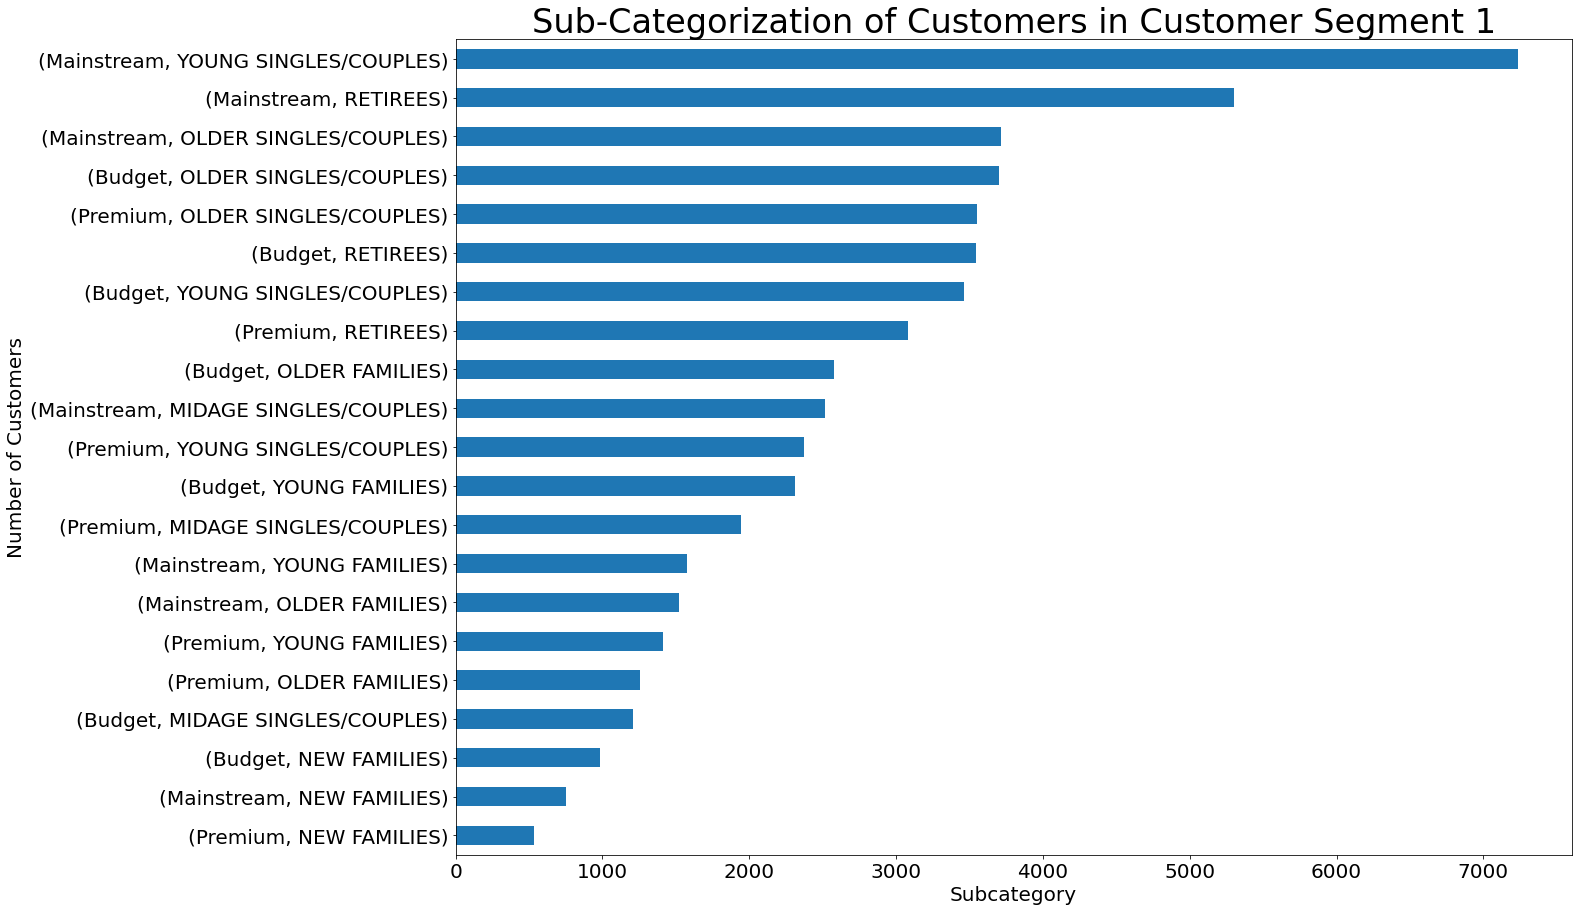

In [737]:
Customer_Segment_1_further_analysis.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().sort_values().plot(kind='barh',figsize=(20,15))
plt.rcParams.update({'font.size': 28})#to set font size of labels and markers
plt.title('Sub-Categorization of Customers in Customer Segment 1')
plt.xlabel('Subcategory')
plt.ylabel('Number of Customers')

Most business bringing stores from customer segment one

In [662]:
most_secessful_stores_top_5_customer_segment_1=Customer_Segment_1_further_analysis.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)

Top 5 well performing stores in Customer Segment 1

In [663]:
most_secessful_stores_top_5_customer_segment_1.head(5)

STORE_NBR
148    7185.3
123    6813.7
80     6786.8
221    6786.0
91     6736.1
Name: TOT_SALES, dtype: float64

Text(0.5, 1.0, 'Performance of Revenue generation in top 5 well performing stores of Customer Segment 1')

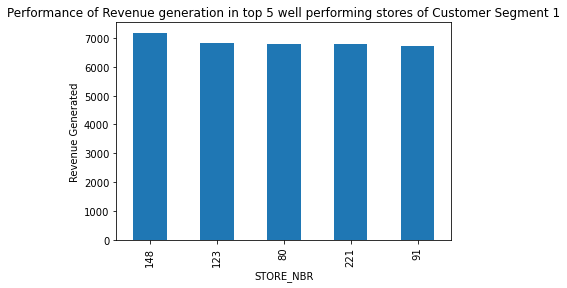

In [665]:
most_secessful_stores_top_5_customer_segment_1.head(5).plot(kind='bar')
plt.ylabel('Revenue Generated')
plt.title('Performance of Revenue generation in top 5 well performing stores of Customer Segment 1')

Top 5 least performing stores in Customer Segment 1

Text(0.5, 1.0, 'Revenue generation in top 5 least performing stores of Customer Segment 1')

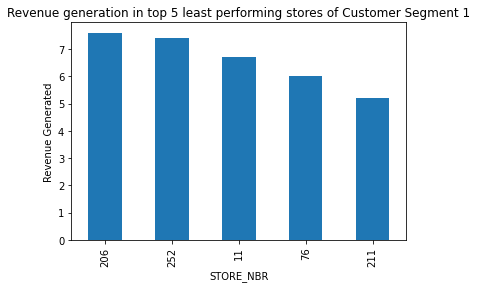

In [666]:
most_secessful_stores_top_5_customer_segment_1.tail(5).plot(kind='bar')
plt.ylabel('Revenue Generated')
plt.title('Revenue generation in top 5 least performing stores of Customer Segment 1')

Exploring Customer_Segment_2

In [667]:
Customer_Segment_2.shape

(18053, 3)

In [668]:
Customer_Segment_2[['Number of Transactions','TOT_amt_SPENT']].describe()

,Number of Transactions,TOT_amt_SPENT
count,18053.000000,18053.000000
mean,7.237744,55.612945
std,1.895591,12.952408
min,3.000000,40.100000
25%,6.000000,45.600000
50%,7.000000,52.400000
75%,8.000000,62.400000
max,18.000000,138.600000


In [669]:
Customer_Segment_2['TOT_amt_SPENT'].sum()

1003980.5

In [671]:
Customer_Segment_2_further_analysis=df2[df2['LYLTY_CARD_NBR'].isin(Customer_Segment_2['LYLTY_CARD_NBR'])]

In [672]:
#exploring products of customer segment 2

In [673]:
customer_segment_2_products_exploration=Customer_Segment_2_further_analysis.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False)

Top Ten Most popular Products of Customer Segment 2

In [674]:
customer_segment_2_products_exploration.head(10)

PROD_NAME
Dorito Corn Chp     Supreme             3606
Smiths Crnkle Chip  Orgnl Big Bag       3515
Kettle Mozzarella   Basil & Pesto       3479
Smiths Crinkle Chips Salt & Vinegar     3459
Cheezels Cheese                         3383
Old El Paso Salsa   Dip Chnky Tom Ht    3284
Kettle Sea Salt     And Vinegar         3283
Smiths Crinkle      Original            3274
Kettle Honey Soy    Chicken             3264
Kettle Tortilla ChpsHny&Jlpno Chili     3260
Name: PROD_QTY, dtype: int64

Top Ten least popular Products of Customer Segment 2

In [675]:
customer_segment_2_products_exploration.tail(10)

PROD_NAME
French Fries Potato Chips               1436
WW D/Style Chip     Sea Salt            1430
WW Crinkle Cut      Original            1421
WW Sour Cream &OnionStacked Chips       1418
Sunbites Whlegrn    Crisps Frch/Onin    1405
WW Original Corn    Chips               1403
WW Crinkle Cut      Chicken             1403
Woolworths Mild     Salsa               1377
Cheezels Cheese Box                     1363
Woolworths Medium   Salsa               1272
Name: PROD_QTY, dtype: int64

Text(0.5, 1.0, 'Categorization of Customers in Customer Segment 2')

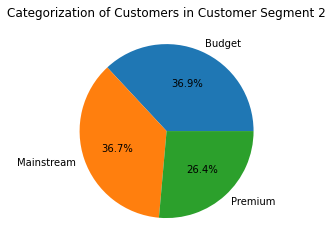

In [676]:
Customer_Segment_2_further_analysis.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique().plot(kind='pie',autopct='%1.1f%%',label=' ')
plt.title('Categorization of Customers in Customer Segment 2')

Text(0, 0.5, 'Number of Customers')

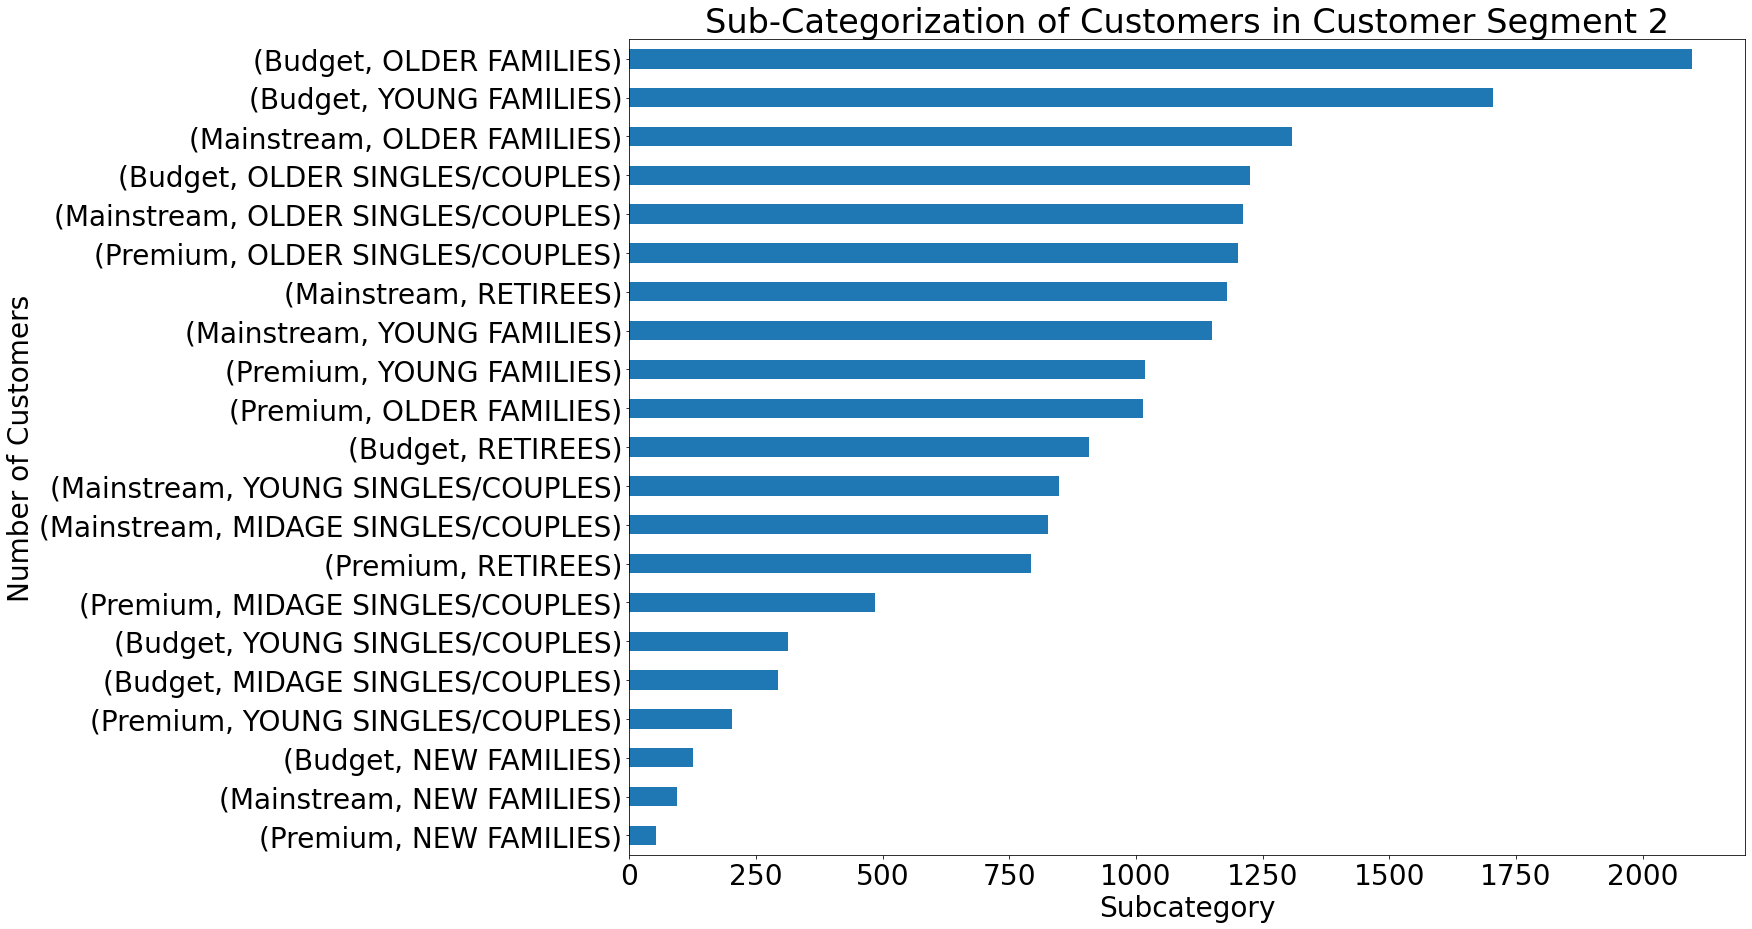

In [741]:
Customer_Segment_2_further_analysis.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().sort_values().plot(kind='barh',figsize=(20,15))
plt.rcParams.update({'font.size':28})

plt.title('Sub-Categorization of Customers in Customer Segment 2')
plt.xlabel('Subcategory')
plt.ylabel('Number of Customers')

Most business bringing stores from customer segment one

In [678]:
most_secessful_stores_top_5_customer_segment_2=Customer_Segment_2_further_analysis.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)

Top 5 well performing stores in Customer Segment 2

In [679]:
most_secessful_stores_top_5_customer_segment_2.head(5)

STORE_NBR
226    13277.25
88     11499.95
165    10977.85
237    10898.60
93     10144.20
Name: TOT_SALES, dtype: float64

Text(0.5, 1.0, 'Performance of Revenue generation in top 5 well performing stores of Customer Segment 2')

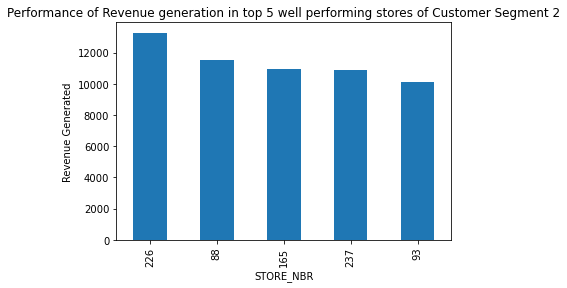

In [680]:
most_secessful_stores_top_5_customer_segment_2.head(5).plot(kind='bar')
plt.ylabel('Revenue Generated')
plt.title('Performance of Revenue generation in top 5 well performing stores of Customer Segment 2')

Top 5 least performing stores in Customer Segment 2

Text(0.5, 1.0, 'Revenue generation in top 5 least performing stores of Customer Segment 2')

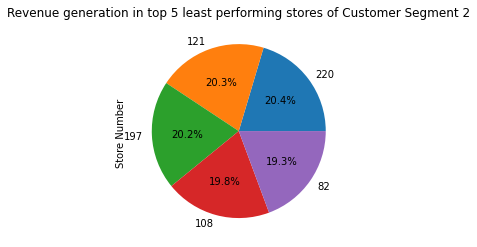

In [691]:
most_secessful_stores_top_5_customer_segment_2.tail(5).plot(kind='pie',autopct='%1.1f%%',label='Store Number ')
plt.title('Revenue generation in top 5 least performing stores of Customer Segment 2')